In [11]:
import mujoco
import os
import mediapy as media
import numpy as np

In [12]:
model = mujoco.MjModel.from_xml_path('/home/simba/projects/thesis/mujoco_test/point_mass.xml')
data = mujoco.MjData(model)

Kp = 10.0  
Ki = 0.5   
Kd = 1.0 

setpoint = np.array([1.0, 0.0, 1.0])

integral_error = np.zeros(3)
previous_error = np.zeros(3)
dt = model.opt.timestep 

""

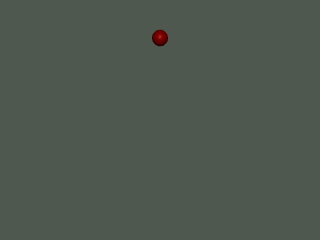

In [13]:
with mujoco.Renderer(model) as renderer:
    
    current_position = data.xpos[model.body("point_mass").id]
    error = setpoint - current_position
    integral_error += error * dt
    derivative_error = (error - previous_error) / dt
    previous_error = error
    
    control_force = Kp * error + Ki * integral_error + Kd * derivative_error
    
    data.xfrc_applied[model.body("point_mass").id][:3] = control_force
    
       
    mujoco.mj_forward(model, data)
    renderer.update_scene(data)

    media.show_image(renderer.render())